Primeiramente, eu analiso todos os alunos que tem uma presença abaixo de 50%, sinalizando uma provável evasão (grande parte desses alunos - se não todos - faltou as ultimas aulas, confirmando uma desistencia do curso)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
plt.close("all")

def converter_presenca(df, coluna='Presença'):
    df[coluna] = (
        df[coluna]
        .astype(str)  
        .str.strip() 
        .str.replace(',', '.', regex=True)  
        .str.replace('%', '', regex=True)  
        .astype(float) 
    )
    return df

PCT = 0.05

matutino1_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 1 - Matutino(1).csv')
matutino1_chamada = converter_presenca(matutino1_chamada)
matutino1_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

vespertino1_chamada = pd.read_csv('Chamada - Introcomp 2024 - Módulo 1 - Vespertino(1).csv')
vespertino1_chamada = converter_presenca(vespertino1_chamada)
vespertino1_chamada.rename(columns={'Unnamed: 0': 'Nome'}, inplace=True)

alunos_manha = pd.read_csv('Processo Seletivo 2024 - Aprovados matutino.csv')
alunos_manha.rename(columns={'name': 'Nome'}, inplace=True)
alunos_manha.Nome = alunos_manha.Nome.str.lower()

alunos_tarde = pd.read_csv('Processo Seletivo 2024 - Aprovados vespertino.csv')
alunos_tarde.rename(columns={'name': 'Nome'}, inplace=True)
alunos_tarde.Nome = alunos_tarde.Nome.str.lower()

alunos_geral = pd.concat([alunos_manha, alunos_tarde], ignore_index= True)

faltaM_1 = matutino1_chamada[matutino1_chamada['Presença'] < 50]
faltaV_1 = vespertino1_chamada[vespertino1_chamada['Presença'] < 50]

nome_evadidos = pd.concat([faltaM_1['Nome'], faltaV_1['Nome']], ignore_index= True)
nome_evadidos = nome_evadidos.to_frame('Nome')
nome_evadidos.Nome = nome_evadidos.Nome.str.lower() 
#alunos_geral

qnd_evadidos = len(faltaM_1) + len(faltaV_1)
qnd_alunos = len(alunos_geral)


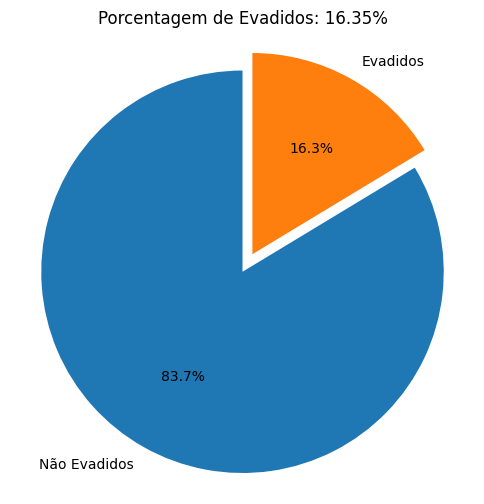

In [19]:
porcentagem_evadidos = (qnd_evadidos / qnd_alunos) * 100


labels = ['Não Evadidos', 'Evadidos']
sizes = [qnd_alunos - qnd_evadidos, qnd_evadidos ]
explode = (0.1, 0)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Porcentagem de Evadidos: {porcentagem_evadidos:.2f}%')
plt.axis('equal')  
plt.show()

In [59]:
inscritos = pd.read_csv('Inscrições 2024 - Página1.csv')
inscritos.rename(columns={'name': 'Nome'}, inplace=True)
inscritos.Nome = inscritos.Nome.str.lower()

COLUMNS_INSCRITOS = ['Nome', 'cidade', 'sabe programar', 'escolaridade', 'genero', 'tem computador', 'tem internet'] #obrigado gabriel s2
inscritos = inscritos.loc[:, COLUMNS_INSCRITOS]

dados_evadidos = pd.merge(nome_evadidos, inscritos, left_on= 'Nome', right_on='Nome')
dados_evadidos


,Nome,cidade,sabe programar,escolaridade,genero,tem computador,tem internet
0,ana clara furtado valim,Vitória,False,1° ano (Ensino Médio),female,True,True
1,arthur luís souza santos,Serra,True,2° ano (Ensino Médio),male,True,True
2,crystopher dos santos de melo,Serra,True,3° ano (Ensino Médio),male,False,True
3,gabriel monte lacerda,Cariacica,True,1° ano (Ensino Médio),male,True,True
4,lucas dos santos felipe,Serra,True,2° ano (Ensino Médio),male,True,True
5,rafael rodrigues inacio,Vitória,False,2° ano (Ensino Médio),male,False,True
6,ryan lopes chaves aguiar,Serra,True,Ensino médio completo até 2023,male,False,True
7,daniel matheus rangel vieira,Vitória,True,2° ano (Ensino Médio),male,False,True
8,gabriele morais santos,Serra,False,3° ano (Ensino Médio),female,False,True
9,samile madeira dos santos,Vila Velha,True,3° ano (Ensino Médio),female,True,True


cidade
Serra         9
Vitória       6
Cariacica     1
Vila Velha    1
Name: , dtype: int64


<Axes: >

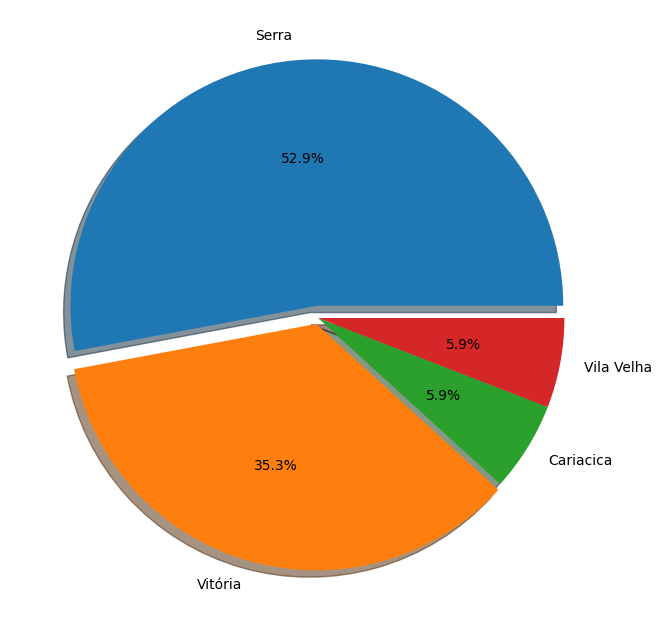

In [73]:
#Cidade, aqui a % é em relação ao total de evadidos

cidade_evadidos = analisa(dados_evadidos, 'cidade', PCT, False)
cidade_evadidos.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025, 0, 0)
)



cidade
Serra               28
Vitória             28
Cariacica           19
Vila Velha          18
Guarapari            7
Domingos Martins     3
Viana                1
Name: , dtype: int64


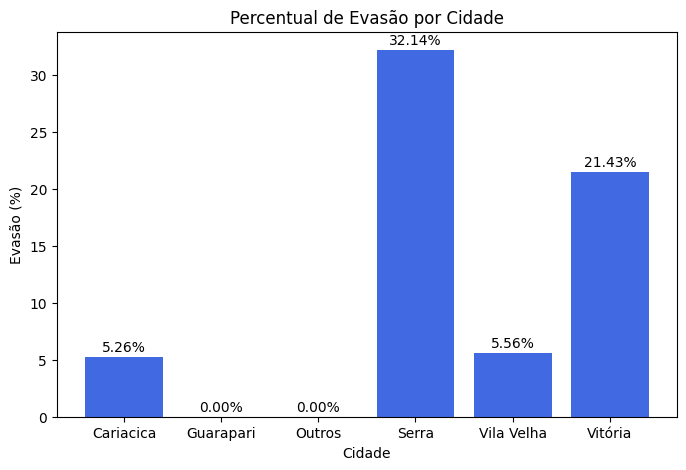

In [89]:
#Relacao entre quantidade de pessoas por cidade e quantidade de evadidos

cidade_aprovados = analisa(alunos_geral, 'cidade', PCT, False)
relacao_cidade = pd.DataFrame({'Evadidos': cidade_evadidos, 'Total_Alunos': cidade_aprovados})
relacao_cidade['Evadidos'] = relacao_cidade['Evadidos'].fillna(0)
relacao_cidade['Percentual_Evasao'] = (relacao_cidade['Evadidos'] / relacao_cidade['Total_Alunos']) * 100

plt.figure(figsize=(8, 5))
plt.bar(relacao_cidade.index, relacao_cidade['Percentual_Evasao'], color='royalblue')

plt.xlabel('Cidade')
plt.ylabel('Evasão (%)')
plt.title('Percentual de Evasão por Cidade')

for i, v in enumerate(relacao_cidade['Percentual_Evasao']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

sabe programar
True     11
False     6
Name: , dtype: int64


<Axes: >

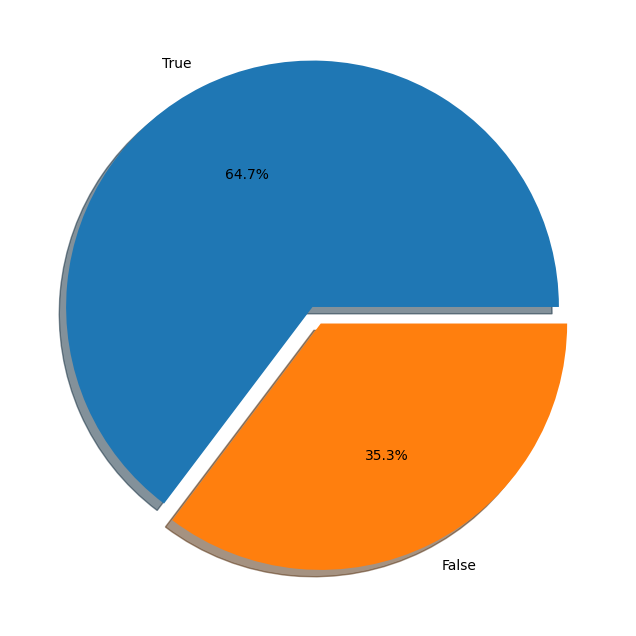

In [49]:
#Se sabe programar

sabeprog = analisa(dados_evadidos,'sabe programar', PCT, False)

sabeprog.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.05, 0.025]  
)



escolaridade
3° ano (Ensino Médio)             6
1° ano (Ensino Médio)             4
2° ano (Ensino Médio)             4
Ensino médio completo até 2023    3
Name: , dtype: int64


<Axes: >

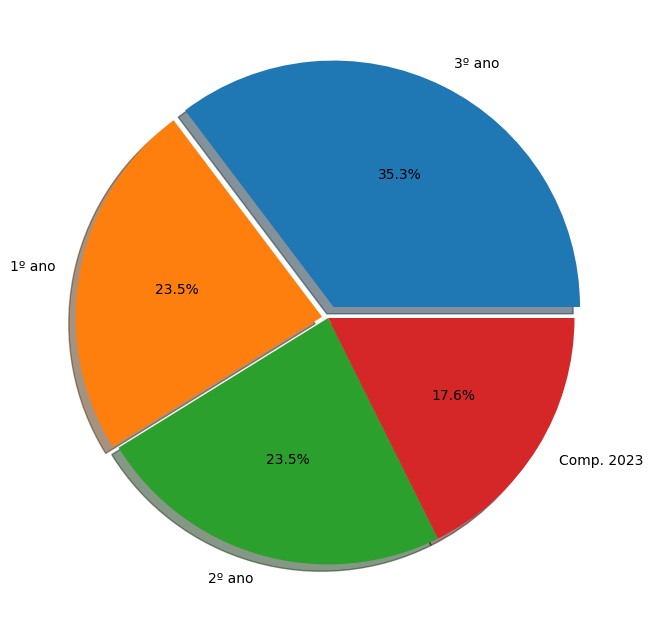

In [112]:
#Escolaridade, aqui a % é em relacao ao total de evadidos 

escolaridade = analisa(dados_evadidos, 'escolaridade', PCT, False)

#se eu nao fizer isso, na hora de fazer o grafico de barras fica um nome em cima do outro
nomes_curto = {
    "1° ano (Ensino Médio)": "1º ano",
    "2° ano (Ensino Médio)": "2º ano",
    "3° ano (Ensino Médio)": "3º ano",
    "Ensino médio completo até 2023": "Comp. 2023",
    "Ensino médio completo até 2022": "Comp. 2022",
    "EJA (Ensino médio)": "EJA"
}
escolaridade = escolaridade.rename(index=nomes_curto)

escolaridade.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    shadow=True,  
    explode=(0.05, 0.025, 0, 0)
)

escolaridade
3° ano (Ensino Médio)             43
2° ano (Ensino Médio)             25
1° ano (Ensino Médio)             22
Ensino médio completo até 2023     9
4° ano (Ensino Médio)              2
Ensino médio completo até 2022     2
EJA (Ensino médio)                 1
Name: , dtype: int64


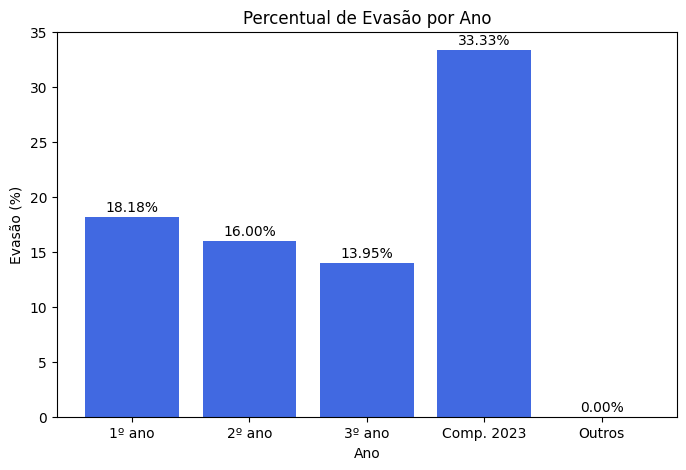

In [114]:
#Relacao entre quantidade de pessoas por ano e quantidade de evadidos

ano_aprovados = analisa(alunos_geral, 'escolaridade', PCT, False)
ano_aprovados = ano_aprovados.rename(index=nomes_curto)
relacao_ano = pd.DataFrame({'Evadidos': escolaridade, 'Total_Alunos': ano_aprovados})
relacao_ano['Evadidos'] = relacao_ano['Evadidos'].fillna(0)
relacao_ano['Percentual_Evasao'] = (relacao_ano['Evadidos'] / relacao_ano['Total_Alunos']) * 100
relacao_ano

plt.figure(figsize=(8, 5))
plt.bar(relacao_ano.index, relacao_ano['Percentual_Evasao'], color='royalblue')

plt.xlabel('Ano')
plt.ylabel('Evasão (%)')
plt.title('Percentual de Evasão por Ano')

for i, v in enumerate(relacao_ano['Percentual_Evasao']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()

tem computador
True     9
False    8
Name: , dtype: int64


<Axes: >

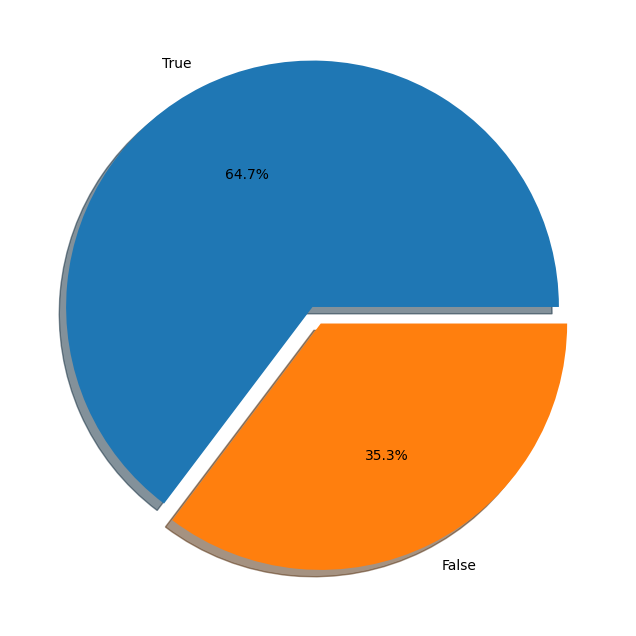

In [58]:
#Tem computador?

possui_computador = analisa(dados_evadidos, 'tem computador', PCT, False)
sabeprog.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.05, 0.025]  
)

tem internet
True    17
Name: , dtype: int64


<Axes: >

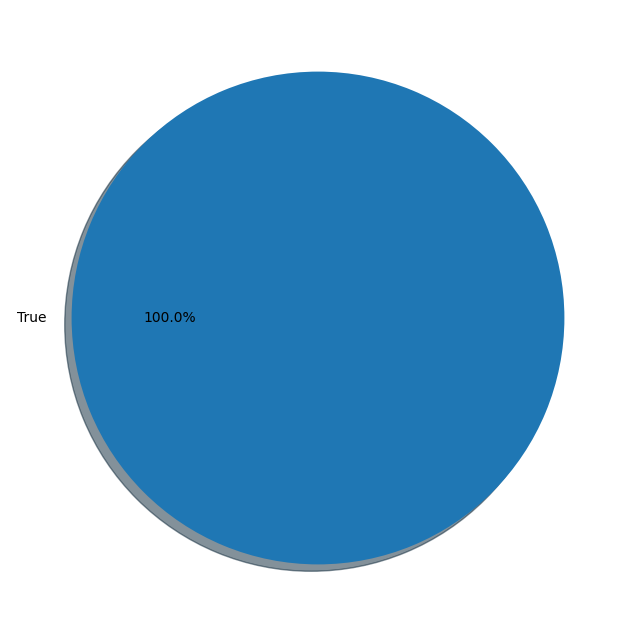

In [62]:
#tem internet

possui_internet = analisa(dados_evadidos, 'tem internet', PCT, False)
possui_internet.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    shadow=True,
    #explode=[0.05, 0.025]  
)

genero
male      10
female     7
Name: , dtype: int64


<Axes: >

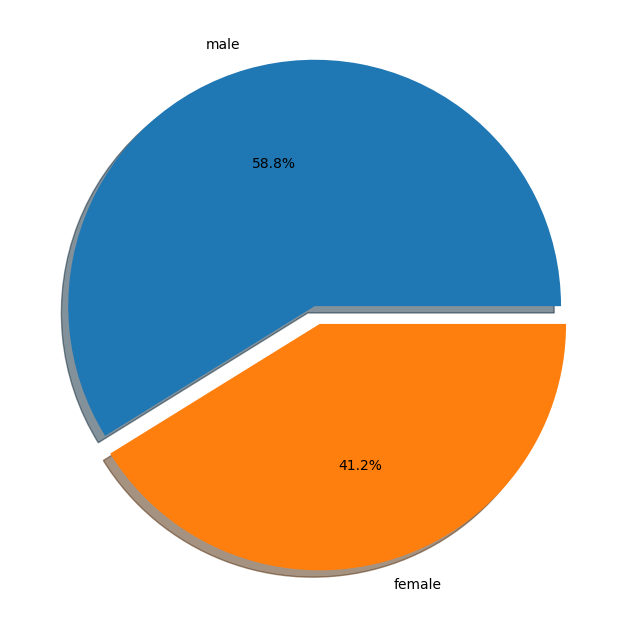

In [115]:
genero_evadido = analisa(dados_evadidos, 'genero', PCT, False)
genero_evadido.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    shadow=True,
    explode=[0.05, 0.025]  
)

genero
male      72
female    31
other      1
Name: , dtype: int64


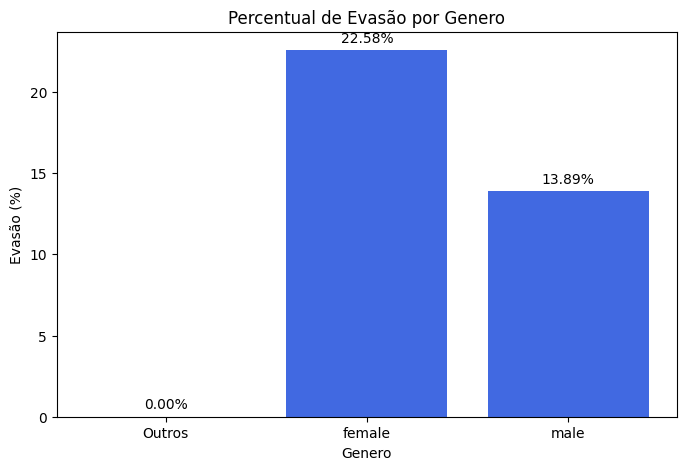

In [118]:
genero_aprovados = analisa(alunos_geral, 'genero', PCT, False)

relacao_genero = pd.DataFrame({'Evadidos': genero_evadido, 'Total_Alunos': genero_aprovados})
relacao_genero['Evadidos'] = relacao_genero['Evadidos'].fillna(0)
relacao_genero['Percentual_Evasao'] = (relacao_genero['Evadidos'] / relacao_genero['Total_Alunos']) * 100

plt.figure(figsize=(8, 5))
plt.bar(relacao_genero.index, relacao_genero['Percentual_Evasao'], color='royalblue')

plt.xlabel('Genero')
plt.ylabel('Evasão (%)')
plt.title('Percentual de Evasão por Genero')

for i, v in enumerate(relacao_genero['Percentual_Evasao']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()